## Perbandingan Metode Logistic Regression, MultinomialNB, SVM, dan K-NN pada Analisis Sentimen Ulasan Aplikasi Gojek di Google Play Store

---



KELOMPOK 1 Jatayu Pirates

ANGGOTA KELOMPOK 1:

1. Audenza Maulana
2. Ardhan Dwinata
3. Asghafi Mubarrak
4. Inayah Khasnaputri Afifah
5. Kiagus Rachmat Fauzan


Analisis sentimen merupakan klasifikasi teks yang bertujuan untuk mengklasifikasikan teks (dokumen) yang berisi opini sebagai opini yang positif, negatif, atau netral. Dataset yang akan kami gunakan adalah ulasan aplikasi Gojek di Google Play Store. Untuk mendapatkan dataset tersebut, kami melakukan proses Data Acquisition terlebih dahulu, menggunakan library google-play-scraper.

## Data Acquisition

In [ ]:
!pip install google-play-scraper

In [ ]:
from google_play_scraper import app
import pandas as pd
import numpy as np

Bahasa ulasan yang kami gunakan adalah Bahasa Indonesia (id), yang diambil dari country Indonesia (id). Kami melakukan Sort.MOST_RELEVANT agar ulasan yang didapatkan lebih aktual dan faktual.

In [ ]:
from google_play_scraper import Sort, reviews_all


id_reviews = reviews_all(
    'com.gojek.app',
    sleep_milliseconds=0, # defaults to 0
    lang='id', # defaults to id
    country='id', # defaults to id
sort=Sort.MOST_RELEVANT, # defaults to Sort.MOST_RELEVANT
)

In [ ]:
df_gojek = pd.DataFrame(np.array(id_reviews),columns=['review'])
df_gojek = df_gojek.join(pd.DataFrame(df_gojek.pop('review').tolist()))
df_gojek.head()

Menyimpan hasil scraping ke dalam bentuk .csv
[Dataset gojek_review](https://drive.google.com/file/d/1BcsoWTiD-6oV7ETo1N3IaI8qtKwZTzFc/view?usp=share_link)

In [ ]:
df_gojek.to_csv("gojek_review.csv")

## Data Exploration

Mount Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Library yang dibutuhkan

In [ ]:
#Import Library
#import path directory
import os
#import library pengolah csv
import csv

#untuk visualisasi
import pandas as pd
import seaborn as sns
import pandas as pd
pd.options.mode.chained_assignment = None
import matplotlib.pyplot as plt

# tokenize dan stopwords dari nltk
import re
import string
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

# library sastrawi
!pip install sastrawi
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
factory = StemmerFactory()
stemmer = factory.create_stemmer()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 209 kB 4.9 MB/s 


In [ ]:
# membaca file dengan dataframe
#with open(path, 'rb') as f: contens = f.read()
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Bahan untuk PA/gojek_review.csv') # ini sesuai path file-nya review gojek
df

In [ ]:
# mengunci data tweet dari baris ke 0 sampai 2000 dan semua kolom
gojek = df.iloc[0:2000,:] # variabel bebas
gojek

In [ ]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

### Function cleaning (case folding, tokenizing, filtering, dan stemming)

In [ ]:
def cleaningText(text):
    text = re.sub(r'#[A-Za-z0-9]+', '', text) # remove hashtag
    text = re.sub(r'[0-9]+', '', text) # remove numbers
    text = re.sub(r'[^\w]', ' ', text) # remove special characters

    text = text.replace('\n', ' ') # replace new line into space
    text = text.translate(str.maketrans('', '', string.punctuation)) # remove all punctuations
    text = text.strip(' ') # remove characters space from both left and right text
    return text

def casefoldingText(text): # Converting all the characters in a text into lower case
    text = text.lower()
    return text

def tokenizingText(text): # Tokenizing or splitting a string, text into a list of tokens
    text = word_tokenize(text)
    return text

def filteringText(text): # Remove stopwors in a text
    listStopwords = set(stopwords.words('indonesian'))
    filtered = []
    for txt in text:
        if txt not in listStopwords:
            filtered.append(txt)
    text = filtered
    return text

def stemmingText(text): # Reducing a word to its word stem that affixes to suffixes and prefixes or to the roots of words
    factory = StemmerFactory()
    stemmer = factory.create_stemmer()
    text = [stemmer.stem(word) for word in text]
    return text

def toSentence(list_words): # Convert list of words into sentence
    sentence = ' '.join(word for word in list_words)
    return sentence

In [ ]:
# isitweet dibersihkan, kemudian dilabeli ulang menjadi text_clean
gojek['content_clean'] = gojek['content'].apply(cleaningText)
gojek['content_clean'] = gojek['content'].apply(casefoldingText)
gojek.drop(['content'], axis = 1, inplace = True)

# hasil preprocess text_clean dilabeli dengan text_preprocessed
# tokenizing, filtering, stemming
gojek['content_preprocessed'] = gojek['content_clean'].apply(tokenizingText)
gojek['content_preprocessed'] = gojek['content_preprocessed'].apply(filteringText)
gojek['content_preprocessed'] = gojek['content_preprocessed'].apply(stemmingText)

# menghapus/drop spam tweets
gojek.drop_duplicates(subset = 'content_clean', inplace = True)

In [ ]:
# menampilkan hasil preprocessing
gojek

In [ ]:
gojek.count()

### Labeling Lexicon dari Github dan telah kami tambahkan kata-katanya.
[Link Github](https://www.google.com/url?sa=t&rct=j&q=&esrc=s&source=web&cd=&cad=rja&uact=8&ved=2ahUKEwiV3o-XluL6AhUNyXMBHfSsCLMQFnoECBYQAQ&url=https%3A%2F%2Fgithub.com%2Ffajri91%2FInSet&usg=AOvVaw1RvcW3-osV6w9bCMKN7tUa&cshid=1665835016557715)

[Negatif](https://drive.google.com/file/d/1UBLrxmfFTEg1t9rHw6v-M5pJVRDWuyFH/view?usp=sharing)

[Positif](https://drive.google.com/file/d/1JqpJ12JqiOMOJ5R0Gg4rz3Xbqe3j2-Om/view?usp=sharing)

In [ ]:
# memberi label data berdasarkan sifatnya
# load lexicon negatif dan positif
lexicon_positive = dict()
import csv
with open('/content/drive/MyDrive/Colab Notebooks/positive.csv', 'r') as csvfile:
    reader = csv.reader(csvfile, delimiter=',')
    for row in reader:
        lexicon_positive[row[0]] = int(row[1])

lexicon_negative = dict()
import csv
with open('/content/drive/MyDrive/Colab Notebooks/negative.csv', 'r') as csvfile:
    reader = csv.reader(csvfile, delimiter=',')
    for row in reader:
        lexicon_negative[row[0]] = int(row[1])

# Function untuk mendeklarasikan polaritas negatif dan positif dari dataset
def sentiment_analysis_lexicon_indonesia(text):
    #for word in text:
    score = 0
    for word in text:
        if (word in lexicon_positive):
            score = score + lexicon_positive[word]
    for word in text:
        if (word in lexicon_negative):
            score = score + lexicon_negative[word]
    polarity=''
    if (score > 0):
        polarity = 'positive'
    elif (score < 0):
        polarity = 'negative'
    else:
        polarity = 'neutral'
    return score, polarity

In [ ]:
# Polarisasi
results = gojek['content_preprocessed'].apply(sentiment_analysis_lexicon_indonesia)
results = list(zip(*results))
gojek['polarity_score'] = results[0]
gojek['polarity'] = results[1]
print(gojek['polarity'].value_counts())

### Membuat pie chart dari hasil labeling

In [ ]:
fig, ax = plt.subplots(figsize = (6, 6))
sizes = [count for count in gojek['polarity'].value_counts()]
labels = list(gojek['polarity'].value_counts().index)
explode = (0.1, 0, 0)
ax.pie(x = sizes, labels = labels, autopct = '%1.1f%%', explode = explode, textprops={'fontsize': 14})
ax.set_title(f'Polaritas Sentiment Terhadap Aplikasi Gojek \n (total = {len(gojek.index)} ulasan)', fontsize = 16, pad = 20)
plt.show()

### Mengelompokkan sentimen positif dan negatif menjadi 1, kemudian save ke dalam csv  menggunakan concate

In [ ]:
# predict polarity positive
pd.set_option('display.max_colwidth', 3000)
positive_gojek = gojek[gojek['polarity'] == 'positive'] # ganti variabel
positive_gojek = positive_gojek[['content_clean', 'polarity_score', 'polarity']].sort_values(by = 'polarity_score', ascending=False).reset_index(drop = True)
positive_gojek.index += 1
positive_gojek[0:10]

In [ ]:
# # save hasil prediction polarity positive ke csv jika perlu
# positive_gojek.to_csv('/content/drive/MyDrive/Colab Notebooks/Bahan untuk PA/gejek_positive.csv') # hasil polaritas positif disimpen di csv. nama bebas
# positive_gojek[0:]

In [ ]:
# predict polarity negative
pd.set_option('display.max_colwidth', 3000)
negative_gojek = gojek[gojek['polarity'] == 'negative']
negative_gojek = negative_gojek[['content_clean', 'polarity_score', 'polarity']].sort_values(by = 'polarity_score', ascending=True).reset_index(drop = True)
negative_gojek.index += 1
negative_gojek[0:10]

In [ ]:
# # save hasil prediction polarity negative ke csv jika perlu
# negative_gojek.to_csv('/content/drive/MyDrive/Colab Notebooks/Bahan untuk PA/gojek_negative.csv') # hasil polaritas positif disimpen di csv. nama bebas
# negative_gojek[0:]

In [ ]:
# menggabungkan hasil negative_tweets dan positive_tweets
concate_data = pd.concat([negative_gojek,positive_gojek])
concate_data.to_csv('/content/drive/MyDrive/Colab Notebooks/Bahan untuk PA/gojek fix.csv') # nama csv bebas
concate_data

Link datasetnya: [gojek_fix.csv]([Positif](https://drive.google.com/file/d/1JqpJ12JqiOMOJ5R0Gg4rz3Xbqe3j2-Om/view?usp=sharing))

### Mengatur ulang atribut di dalam csv, kemudian menyimpannya ke dalam csv

In [ ]:
# menagtur ulang atribut pada csv
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Bahan untuk PA/gojek fix.csv')
df_reorder = df[['polarity', 'content_clean', 'polarity_score']] # rearrange column here
df_reorder.to_csv('/content/drive/MyDrive/Colab Notebooks/Bahan untuk PA/gojek_fix2.csv', index=False)

## Modeling

In [ ]:
# library yang dibutuhkan untuk modeling dan evaluation
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re
from nltk.tokenize import word_tokenize

### Dataset yang telah kami ubah positive menjadi 1, negative menjadi 0 secara manual
[Link gojek_train_cleaner](https://drive.google.com/file/d/1taBa83hyKpNBSrKdCs9wkdGXZ8J4Rhu8/view?usp=share_link)

Hanya menggunakan atribut cleaner_content dan polarity

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Bahan untuk PA/gojek_train_cleaner.csv')
df = df[['cleaner_content', 'polarity']]
df.head()

,cleaner_content,polarity
0,kecewa karna limit gopay later blokir bayar ta...,0
1,bro minimal driver tuh bener dikit gw tau cost...,0
2,parah ribet banget cancel driver cancel order...,0
3,aplikasi gojek beda go play gopay aplikasi goj...,0
4,tiba2 order tolak terus location ga ketul tuli...,0


In [ ]:
# set label ke dalam variabel y
y = df['polarity']
y[0:5] # baris ke 0 dan kolom ke 5

0    0
1    0
2    0
3    0
4    0
Name: polarity, dtype: int64

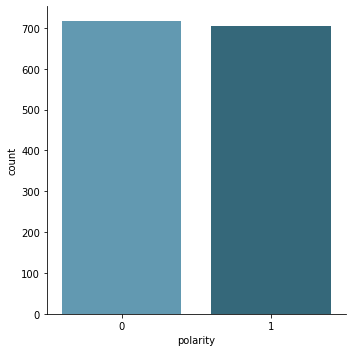

In [ ]:
# menampilkan grafik nilai dari variabel y
sns.catplot(x="polarity", data=df, kind="count", height=5, aspect=1, palette="PuBuGn_d")
plt.show();

### Modeling menggunakan 4 algoritma, yaitu Logistic Regression, MultinomialNB, SVM, dan K-NN

Pembobotan dengan TF-IDF dan split gojek_train_cleaner menjadi data train dan test (80:20)

In [ ]:
%%time

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import f1_score, log_loss, accuracy_score, recall_score, precision_score, roc_auc_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

# membangun vector space model/pembobotan dengan tfidf
vectorizer = TfidfVectorizer(ngram_range=(1, 3), min_df=10)
X = vectorizer.fit_transform(df.cleaner_content) #df.cleaner_content -> ngambil atribut cleaner_content dari dataset (df)

# melakukan split data training untuk mengetahui akurasi
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X.shape, y.shape

CPU times: user 120 ms, sys: 7.49 ms, total: 127 ms
Wall time: 154 ms


((1422, 540), (1422,))

Modeling dengan Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

LR_ = LogisticRegression(C=3.7, solver='liblinear', max_iter = 200).fit(X_train, y_train) # solver : {'newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'}
LR_.score(X_train, y_train)

0.9454705364995603

Modeling dengan MultinomialNB

In [ ]:
from sklearn.naive_bayes import MultinomialNB

# modeling Naive Bayes
NB = MultinomialNB(alpha=0.5) #default alpha = 1.0
NB.fit(X_train, y_train)
NB.score(X_train, y_train)

0.8390501319261213

Modeling dengan SVM

In [ ]:
from sklearn import svm

SVM_ = svm.SVC(C=3, kernel='rbf', probability=True,  max_iter = 150).fit(X_train, y_train)
SVM_.score(X_train, y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=150).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


0.9357959542656112

Modeling dengan K-NN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

KNN = KNeighborsClassifier(n_neighbors=2, weights='distance', algorithm='brute', leaf_size=100, p=2, metric='minkowski').fit(X_train, y_train)
KNN.score(X_train, y_train)

1.0

## Evaluation

### Evaluasi Model Logistic Regression

In [ ]:
# melakukan evaluasi
yhat = LR_.predict(X_test)
print('F1 score: ', f1_score(y_test, yhat, average='weighted')) # average = weighted | binary
print('Accuration score: ', accuracy_score(y_test, yhat))
print('Recall score: ', recall_score(y_test, yhat, average='weighted'))
print('Precision score: ', precision_score(y_test, yhat, average='weighted'))
print('ROC AUC score: ', roc_auc_score(y_test, yhat, average='weighted'))

yhat_prob = LR_.predict_proba(X_test)
print('Log Loss: ', log_loss(y_test, yhat_prob))

F1 score:  0.8243925793560094
Accuration score:  0.8245614035087719
Recall score:  0.8245614035087719
Precision score:  0.824957129666271
ROC AUC score:  0.8239381097861438
Log Loss:  0.3857110768469471


Classification report Logistic Regression

In [ ]:
print(classification_report(y_test, LR_.predict(X_test)))

              precision    recall  f1-score   support

           0       0.82      0.85      0.83       146
           1       0.83      0.80      0.82       139

    accuracy                           0.82       285
   macro avg       0.83      0.82      0.82       285
weighted avg       0.82      0.82      0.82       285



Confusion Matrix Logistic Regression

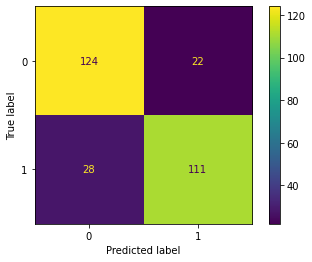

In [ ]:
cm = confusion_matrix(y_test, LR_.predict(X_test))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=LR_.classes_)
disp.plot()

### Evaluasi Model MultinomialNB

In [ ]:
yhat = NB.predict(X_test)
print('F1 score: ', f1_score(y_test, yhat, average='weighted')) # average = weighted | binary
print('Accuration score: ', accuracy_score(y_test, yhat))
print('Recall score: ', recall_score(y_test, yhat, average='weighted'))
print('Precision score: ', precision_score(y_test, yhat, average='weighted'))
print('ROC AUC score: ', roc_auc_score(y_test, yhat, average='weighted'))

yhat_prob = NB.predict_proba(X_test)
print('Log Loss: ', log_loss(y_test, yhat_prob))

F1 score:  0.7611739079241727
Accuration score:  0.7614035087719299
Recall score:  0.7614035087719299
Precision score:  0.7616211581585544
ROC AUC score:  0.7607420912585001
Log Loss:  0.5124389299591752


Classification Report MultinomialNB

In [ ]:
print(classification_report(y_test, NB.predict(X_test)))

              precision    recall  f1-score   support

           0       0.76      0.79      0.77       146
           1       0.77      0.73      0.75       139

    accuracy                           0.76       285
   macro avg       0.76      0.76      0.76       285
weighted avg       0.76      0.76      0.76       285



Confusion Matrix MultinomialNB

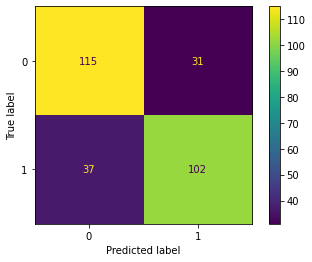

In [ ]:
cm = confusion_matrix(y_test, NB.predict(X_test))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=NB.classes_)
disp.plot()

### Evaluasi Model SVM

In [ ]:
yhat = SVM_.predict(X_test)
print('F1 score: ', f1_score(y_test, yhat, average='weighted')) # average = weighted | binary
print('Accuration score: ', accuracy_score(y_test, yhat))
print('Recall score: ', recall_score(y_test, yhat, average='weighted'))
print('Precision score: ', precision_score(y_test, yhat, average='weighted'))
print('ROC AUC score: ', roc_auc_score(y_test, yhat, average='weighted'))

yhat_prob = SVM_.predict_proba(X_test)
print('Log Loss: ', log_loss(y_test, yhat_prob))

F1 score:  0.7649122807017544
Accuration score:  0.7649122807017544
Recall score:  0.7649122807017544
Precision score:  0.7658357236345027
ROC AUC score:  0.7653740021681286
Log Loss:  0.4602198755340401


Classification Report SVM

In [ ]:
print(classification_report(y_test, SVM_.predict(X_test)))

              precision    recall  f1-score   support

           0       0.78      0.75      0.76       146
           1       0.75      0.78      0.76       139

    accuracy                           0.76       285
   macro avg       0.77      0.77      0.76       285
weighted avg       0.77      0.76      0.76       285



Confusion Matrix SVM

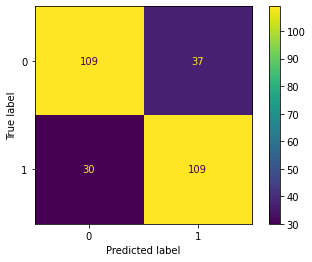

In [ ]:
cm = confusion_matrix(y_test, SVM_.predict(X_test))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=SVM_.classes_)
disp.plot()

### Evaluasi Model K-NN

In [ ]:
# melakukan evaluasi
yhat = KNN.predict(X_test)
print('F1 score: ', f1_score(y_test, yhat, average='binary')) # average = weighted | binary
print('Accuration score: ', accuracy_score(y_test, yhat))
print('Recall score: ', recall_score(y_test, yhat, average='binary'))
print('Precision score: ', precision_score(y_test, yhat, average='weighted'))
print('ROC AUC score: ', roc_auc_score(y_test, yhat, average='weighted'))

yhat_prob = KNN.predict_proba(X_test)
print('Log Loss: ', log_loss(y_test, yhat_prob))

F1 score:  0.6565656565656566
Accuration score:  0.5228070175438596
Recall score:  0.935251798561151
Precision score:  0.5943253074320041
ROC AUC score:  0.5326943924312604
Log Loss:  6.53326811032147


Classification Report K-NN

In [ ]:
print(classification_report(y_test, KNN.predict(X_test)))

              precision    recall  f1-score   support

           0       0.68      0.13      0.22       146
           1       0.51      0.94      0.66       139

    accuracy                           0.52       285
   macro avg       0.59      0.53      0.44       285
weighted avg       0.59      0.52      0.43       285



Confusion Matrix K-NN

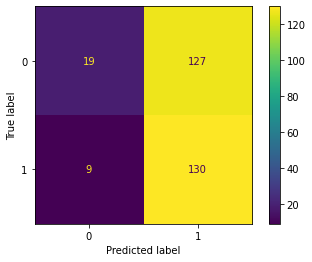

In [ ]:
cm = confusion_matrix(y_test, KNN.predict(X_test))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=KNN.classes_)
disp.plot()

# Memprediksi hasil Pengujian Data

## Logistic Regression mendapatkan hasil accuration, recall, f1-score, dan precision tertinggi. Hasil classification report dan confusion matrix juga baik dan akurat. Maka, Logistic Regression (LR) kami pilih untuk melakukan prediksi pengujian data menggunakan dataset uji.




*   Link dataset = [gojek_test.csv](https://drive.google.com/file/d/1UPZ558sSyeHcfGozeFEA-gg3KJ93wf-e/view?usp=share_link)
*   Link stopwordlist = [stopwordlist.txt](https://drive.google.com/file/d/1BflOn2mYrzIPYzG1WWlIuIeivckdphbv/view?usp=share_link)



In [ ]:
# prediksi data yang tidak diketahui labelnya
# preprocessing data yang tidak diketahui albelnya
df_test = pd.read_csv(r'/content/drive/MyDrive/Colab Notebooks/Bahan untuk PA/gojek_test.csv')
df_test.head()

,content
0,sekarang kenapa promonya ga bisa kepasang lang...
1,aku mau cerita pengalaman ku menggunakan gojek...
2,paket gofood plus nya kenapa diubah jadi maksi...
3,sebelumnya promo gofood dari resto terpasang o...
4,sekarang promo gak bisa otomatis terpasang dlu...


### Cleaning gojek_test.csv

In [ ]:
# menyimpan kata-kata stopword dari stopwordlist.txt
f=open('/content/drive/MyDrive/Colab Notebooks/Bahan untuk PA/stopwordlist.txt') # diambil dari "Bahan untuk PA". sesuaikan path dari drive masing2
ina_stopword = f.read()

tempStoplist = []
# split data
for tempstp in ina_stopword.split():
  tempStoplist.append(tempstp)

In [ ]:
text_cleaning_re = '@#=-_\S+|https?:\S+http?:\S|{^A-Za-z}+:\S[0-9]+' # menghapus tanda baca yang tidak diperlukan
# text = re.sub(r'[0-9]+', '', text) # remove numbers
#     text = re.sub(r'[^\w]', ' ', text) # remove special characters

def preprocessing(gojek):
  gojek = re.sub(text_cleaning_re, '', str(gojek).lower()).strip() # casefolding (mengubah semua bentuk huruf huruf kecil semua) dan remove punctuation
  tokens = []
  for token in gojek.split():
    if token not in tempStoplist: # jika token tidak ada di stopword, maka akan disimpan
      token = stemmer.stem(token) # stemming
      tokens.append(token) # menambahkan hasil stemming ke list tokens
  return " ".join(tokens)


In [ ]:
# casefolding, filtering, dan stemming data yang tidak diketahui labelnya

df_test['clean_content'] = df_test.content.apply(lambda x: preprocessing(x)) #memanggil function preprocessing
df_test['clean_content'] = df_test.clean_content.str.replace('ðŸ‘Ž', '') # menghapus huruf acakadul
df_test.head()

,content,clean_content
0,sekarang kenapa promonya ga bisa kepasang lang...,promonya ga pasang langsung ya pdahal mudah m...
1,aku mau cerita pengalaman ku menggunakan gojek...,cerita alam ku gojek ini 2 minggu pesan gocar ...
2,paket gofood plus nya kenapa diubah jadi maksi...,paket gofood plus ubah maksimal free ongkir 20...
3,sebelumnya promo gofood dari resto terpasang o...,promo gofood resto pasang otomatis min skrg ya...
4,sekarang promo gak bisa otomatis terpasang dlu...,promo otomatis pasang dlu 2 pake voucher promo...


In [ ]:
# pembobotan data test

# vector_test = TfidfVectorizer(ngram_range=(1,3), min_df=10)
# feature_test = vector_test.fit_transform(df_test.clean_content)

### Train data test agar dapat memprediksi input dari user

In [ ]:
# function training data test
def training_step(data, vectorizer):
  features = vectorizer.fit_transform(df.cleaner_content) # pake atribut cleaner_content dari dataset df (dataframe train)
  LR_ = LogisticRegression(C=3, solver='liblinear', max_iter = 150).fit(features, y)
  return LR_

# testing
classifier = training_step(df.cleaner_content, vectorizer)
result = classifier.predict(vectorizer.transform(df_test.clean_content))

result

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

Menyimpan hasil prediksi ke dalam bentuk txt

In [ ]:
np.savetxt('/content/drive/MyDrive/Colab Notebooks/Bahan untuk PA/hasil_pred_LR_gojek.txt', result, fmt='%i', delimiter='\n')

Memanggil hasil prediksi untuk melakukan prediksi ulasan input dari user

In [ ]:
df_hasil = pd.read_csv(r'/content/drive/MyDrive/Colab Notebooks/Bahan untuk PA/hasil_pred_LR_gojek.txt')
df_hasil.head()

,1
0,1
1,1
2,1
3,1
4,1


Function untuk memprediksi input dari user. Hasil yang akan keluar dari prediksi input user adalah positif atau negatif.

In [ ]:
def prediksi_ulasan(ulasan):
  result = classifier.predict(vectorizer.transform([ulasan]))
  # jika angka 1, maka positif. lainnya negatif
  if result == 1:
    return "Positif"
  else:
    return "Negatif"

Memprediksi ulasan bebas berupa input dari user tentang aplikasi Gojek. Model akan memprediksi ulasan tersebut masuk ke sentimen negatif atau positif.

In [ ]:
prediksi_ulasan('aplikasinya bagus, diskonnya banyak.')

'Positif'

In [ ]:
prediksi_ulasan('lag parah banget aplikasinya. mohon diperbaiki.')

'Negatif'